In [14]:
from larcv import larcv
larcv.load_pyutil
larcv.load_cvutil

import ROOT
from ROOT import fcllite
from ROOT import geo2d
from ROOT import larocv

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [15]:
clusterhm = larocv.ClusterHIPMIP()
logger=clusterhm.logger()
logger.set(0)
#set mask on
clusterhm._mask_hip=True
print "Logger level is...",logger.level()

Logger level is... 0


In [16]:
ctor = ROOT.std.vector(ROOT.cv.Point_('int'))()

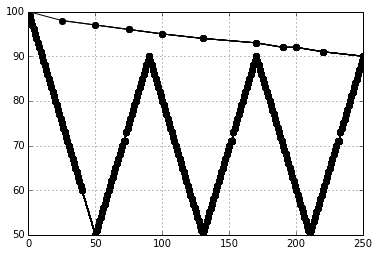

In [17]:
# make some lines
line1 = geo2d.Line("float")(50,50,-45)
line2 = geo2d.Line("float")(50,50,45)


ctor.clear()


for i in xrange(0,41,1):
    ctor.push_back(ROOT.cv.Point_("int")(int(i),int(line1.x(i))))
for i in xrange(0,41,1):
    ctor.push_back(ROOT.cv.Point_("int")(int(i)+50,int(line2.x(i)+50)))
for i in xrange(0,41,1):
    ctor.push_back(ROOT.cv.Point_("int")(int(i)+90,int(line1.x(i)-10)))
for i in xrange(0,41,1):
    ctor.push_back(ROOT.cv.Point_("int")(int(i)+130,int(line2.x(i)+50)))
for i in xrange(0,41,1):
    ctor.push_back(ROOT.cv.Point_("int")(int(i)+170,int(line1.x(i)-10)))
for i in xrange(0,41,1):
    ctor.push_back(ROOT.cv.Point_("int")(int(i)+210,int(line2.x(i)+50)))
    
#for i in xrange(0,100,10):
#    ctor.push_back(ROOT.cv.Point_("int")(int(i)+50,int(line1.x(i))))
    
pt_x=[]
pt_y=[]
ctor.push_back(ROOT.cv.Point_("int")(220,91))
ctor.push_back(ROOT.cv.Point_("int")(200,92))
ctor.push_back(ROOT.cv.Point_("int")(190,92))
ctor.push_back(ROOT.cv.Point_("int")(170,93))
ctor.push_back(ROOT.cv.Point_("int")(130,94))
ctor.push_back(ROOT.cv.Point_("int")(100,95))
ctor.push_back(ROOT.cv.Point_("int")(75,96))
ctor.push_back(ROOT.cv.Point_("int")(50,97))
ctor.push_back(ROOT.cv.Point_("int")(25,98))

ctor.push_back(ctor[0])
for pt in ctor:
    pt_x.append(pt.x)
    pt_y.append(pt.y)
    plt.plot(pt_x,pt_y,'o-',color='black',lw=1)

plt.grid()
plt.show()

In [18]:
clusterhm

<ROOT.larocv::ClusterHIPMIP object at 0x7fb6a2f64d90>

In [19]:
# make a fake image...
a=np.zeros((450,450))

In [20]:
# make a path representing this contour
path_list1 = []
path_list2 = []
path_list3 = []
for pt in ctor:
    path_list1.append((pt.x,pt.y)) 
    path_list2.append((pt.x,pt.y+100))
    path_list3.append((pt.x,pt.y+200))

In [21]:
path1 = matplotlib.path.Path(path_list1)
path2 = matplotlib.path.Path(path_list2)
path3 = matplotlib.path.Path(path_list3)

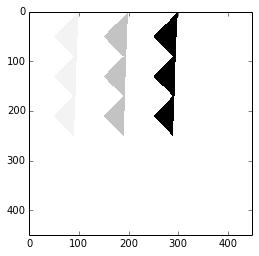

In [22]:
img1 = path1.contains_points(np.row_stack(np.where(a==0)).T).reshape(450,450).astype(np.uint8)
img2 = path2.contains_points(np.row_stack(np.where(a==0)).T).reshape(450,450).astype(np.uint8)
img3 = path3.contains_points(np.row_stack(np.where(a==0)).T).reshape(450,450).astype(np.uint8)

#set img1 values to be 5 
img1=np.where(img1>0,img1+5,0)
#set img1 values to be 20
img2=np.where(img2>0,img2+20,0)
#set img2 values to be 60
img3=np.where(img3>0,img3+60,0)

#add them...
img = img1+img2+img3

plt.imshow(img,cmap='Greys',interpolation='none')
plt.show()

In [23]:
#Got a mat object to send...
mat = larcv.as_gray_mat(larcv.as_image2d(img))

In [24]:
hip_mip_pair = clusterhm.IsolateHIPMIP(mat)

In [25]:
#mips...
hips = hip_mip_pair.first
#hips...
mips = hip_mip_pair.second

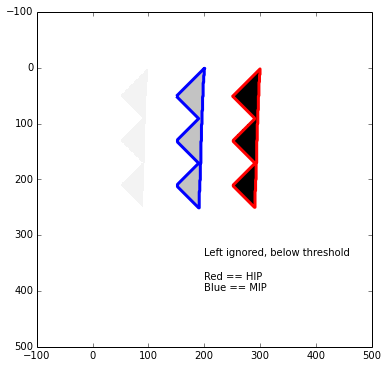

In [26]:
plt.imshow(img,cmap='Greys',interpolation='none')

color='blue'
for mip in mips:
    ctor_v = np.array([[pt.x,pt.y] for pt in mip])
    plt.plot(ctor_v[:,1],ctor_v[:,0],'-',lw=3,color=color)

color='red'
for hip in hips:
    ctor_v = np.array([[pt.x,pt.y] for pt in hip])
    plt.plot(ctor_v[:,1],ctor_v[:,0],'-',lw=3,color=color)

ax=plt.gca()
ax.text(200,400,"Left ignored, below threshold\n\nRed == HIP\nBlue == MIP") 
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()
